#1. Determining the significance of the project





##1.1 Objective 



To predict the risk of developing breast cancer

##1.2 Description

Breast cancer is the most common cancer among women in both developed and developing countries. The incidence of breast cancer in developing countries is on the rise due to rising life expectancy, further urbanization and an increasing acceptance of Western lifestyles. Breast cancer is the most common cancer among women in both developed and developing countries. The incidence of breast cancer in developing countries is increasing due to increasing life expectancy, further urbanization and the increasing acceptance of Western lifestyles.
Any disease is better prevented than cured. Therefore, the creation of a model that predicts the possibility of developing breast cancer can help doctors predict the development of the disease in patients with a burdened history.

# 2. Data Understanding

##2.1 Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2.2 Loading data. Statistics. Visualization

In [6]:
df = pd.read_csv('/content/drive/MyDrive/test_tasks/gail_model_task/gail_feature.csv')
df.head()

,study_id,phx_brca_test,ccr_LCIS,T1,N_Biop,HypPlas,AgeMen,Age1st,N_Rels,status,Race
0,0,0,0,45,99,99,13,22,1,0,3
1,1,0,0,60,1,0,11,19,0,0,2
2,2,0,0,75,0,99,13,98,0,0,3
3,3,0,0,74,0,99,12,22,0,1,1
4,4,0,0,65,0,99,17,98,1,0,1


###2.2.1 Description of variables

AgeMen: First menstrual period 

Age1st: First live birth 

N_Rels: First-degree relatives with breast cancer 

N_Biop: Previous breast biopsy  

Race: Race

ccr_LCIS: Does the woman have a medical history of any breast cancer or of ductal carcinoma in situ (DCIS) or lobular carcinoma in situ (LCIS) or has she received previous radiation therapy to the chest for treatment of Hodgkin lymphoma? 

phx_brca_test: Does the woman have a mutation in either the BRCA1 or BRCA2 gene, or a diagnosis of a genetic syndrome that may be associated with elevated risk of breast cancer?

T1: Age at test

HypPlas: Has the patient ever had a breast biopsy with atypical hyperplasia?

Status: Breast Cancer Status

### 2.2.2 Let's take a look at the key information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   study_id       14055 non-null  int64
 1   phx_brca_test  14055 non-null  int64
 2   ccr_LCIS       14055 non-null  int64
 3   T1             14055 non-null  int64
 4   N_Biop         14055 non-null  int64
 5   HypPlas        14055 non-null  int64
 6   AgeMen         14055 non-null  int64
 7   Age1st         14055 non-null  int64
 8   N_Rels         14055 non-null  int64
 9   status         14055 non-null  int64
 10  Race           14055 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


We found that we have data on 14055 patients. There are no missing values. In all lines, the variable type is int 64.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
study_id,14055.0,7027.000000,4057.473352,0.0,3513.5,7027.0,10540.5,14054.0
phx_brca_test,14055.0,0.049235,0.255567,0.0,0.0,0.0,0.0,3.0
ccr_LCIS,14055.0,0.001067,0.032652,0.0,0.0,0.0,0.0,1.0
T1,14055.0,55.158307,11.651419,14.0,46.0,54.0,63.0,95.0
N_Biop,14055.0,11.115048,30.724288,0.0,0.0,0.0,1.0,99.0
HypPlas,14055.0,80.961580,38.197899,0.0,99.0,99.0,99.0,99.0
AgeMen,14055.0,15.261473,14.050105,9.0,12.0,13.0,14.0,99.0
Age1st,14055.0,39.935966,29.496525,11.0,22.0,27.0,35.0,99.0
N_Rels,14055.0,0.990110,9.033852,0.0,0.0,0.0,0.0,99.0
status,14055.0,0.082319,0.274861,0.0,0.0,0.0,0.0,1.0


Interesting information that the maximum age of the first birth and first menstruation is 99 years. Since this cannot be a priori from a medical point of view, we come to the conclusion that the data has already been cleared and the missing values ​​are filled in in the maximum values ​​of the first menstruation and the first birth - the number 99.


Let's look at possible signs of the menarhe of patients.

In [9]:
df['AgeMen'].value_counts()


13    3668
12    3216
14    2215
11    1596
15    1330
16     602
10     512
99     380
17     314
9      222
Name: AgeMen, dtype: int64

So we can see that the late first menstruation began in 314 patients in 17 years old. Very early menarche at 9 years old  in 222 women. Also, in 380 patients, the age of the onset of menstruation is unknown.

Let's take a look at the age of first birth of the studied women.

In [10]:
df['Age1st'].value_counts()


98    2520
22    1656
19    1313
27    1298
34     926
20     498
21     418
25     415
26     410
24     401
23     386
29     384
28     373
30     360
18     353
17     285
99     278
31     271
32     241
33     222
35     168
16     155
36     154
40     104
38      96
37      94
15      78
39      68
41      32
14      24
42      23
43      15
45      12
47       6
13       5
44       5
48       2
11       2
12       2
50       1
46       1
Name: Age1st, dtype: int64

The fact of the presence of very late first births is alarming (Age 50 - 1 woman, age 48 - 2 women, age 47 - 3 women, age 45 - 12 women, age 42 - 23 women). Although, it is possible that these women resorted to assisted reproductive technologies. 
There were also very early first births. 2 women gave birth for the first time at 11 years old, 2 at 12, 5 at 13 years old.
Also, 2798 women did not remember the age when they had their first birth.

Let's look at the number of relatives with breast cancer.

In [11]:
df['N_Rels'].value_counts()

0     11959
1      1781
2       179
99      118
3        15
39        1
6         1
5         1
Name: N_Rels, dtype: int64

We see that the majority of women did not have any relatives with breast cancer. However, we also see that 15 women had 3 relatives each with breast cancer. Also, women had 5 and 6 relatives with breast cancer. The variant of a woman with 39 relatives suffering from cancer is obviously a mistake.

Let's look at the number of breast biopsies in female patients.

In [12]:
df['N_Biop'].value_counts()

0     9200
1     1898
99    1530
2     1427
Name: N_Biop, dtype: int64

We can see that the majority of women have not had previous breast biopsies.

Let's take a look at the distribution of women by race.

In [13]:
df['Race'].value_counts()

1    5565
3    5120
0    1190
4     741
6     633
8     386
2     224
7     190
9       6
Name: Race, dtype: int64

Can't comment

Let's see if women have a history of lobular breast cancer.

In [14]:
df['ccr_LCIS'].value_counts()

0    14040
1       15
Name: ccr_LCIS, dtype: int64

15 women already had breast cancer.

Let's see if women have a mutation in their BRCA 1 and BRCA 2 genes.

In [15]:
df['phx_brca_test'].value_counts()


0    13457
1      540
3       36
2       22
Name: phx_brca_test, dtype: int64

540 women had mutation in BRCA1 gene, 22 women had a gene mutation in BRCA2. But more women had no mutations at all.

Let's look at the presence of atypical hyperplasia in the breast.

In [16]:
df['HypPlas'].value_counts()

99    11492
0      2356
1       207
Name: HypPlas, dtype: int64

Many missing values. It cannot be said that it strongly influences the model.

Let's take a look at the age of women who come to the appointment for breast cancer.

In [17]:
df['T1'].value_counts()

40    601
41    503
45    465
44    460
43    460
     ... 
92      1
14      1
94      1
15      1
95      1
Name: T1, Length: 80, dtype: int64

We see that the majority of women are over the age of 40. BC variant was encountered three times in elderly patients (92, 94, 95 years old).
It is also worth noting that breast cancer was found in one woman of 14 years old, and one woman of 15 years old.

Checking empty voids 

In [18]:
df[df['T1']==98]

,study_id,phx_brca_test,ccr_LCIS,T1,N_Biop,HypPlas,AgeMen,Age1st,N_Rels,status,Race


In my opinion, there are not enough signs. A more accurate picture of the predisposition to the development of breast cancer would be in the presence of information about:

*   Taking hormonal contraceptives
*   Hormone replacement therapy
*   Overweight, obesity
*   Diabetes, Diseases of the thyroid gland
*	  Endometrial hyperplasia, endometrial polyps
*	  Cosmetic surgery (breast augmentation, lip augmentation)
*   Alcohol consumption
*   Eating fast food
*  	Influence of the environment
*   Pregnancies that ended in abortion
*  	Refusal to breastfeed
*  	Age of sexual debut
* 	Using of deodorants, sunscreens (EDCs)
* 	Smoking
*  	Physical inactivity
* 	Infectious diseases
* 	Violations of the daily routine

We can also include a number of studies related to breast ultrasound, mammography and MRI results.


Now let's look at the presence of breast cancer.

In [19]:
df['status'].value_counts()

0    12898
1     1157
Name: status, dtype: int64

We see that 12898 people are healthy, and 1157 with cancer.

##2.3 Visualization

Let's build graphs to track dependencies.

In [20]:
df1 = df[df['AgeMen']<20]

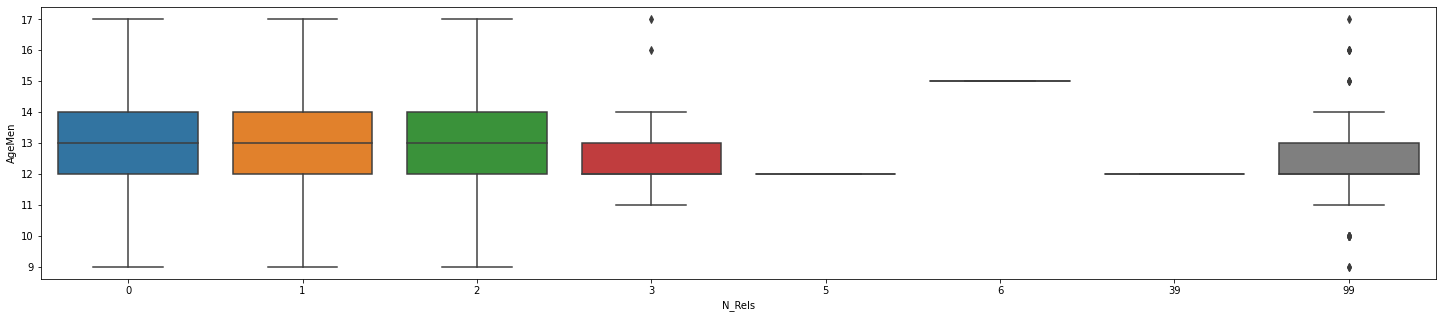

In [21]:
plt.figure(figsize=(25,5))
sns.boxplot(y=df1['AgeMen'], x=df['N_Rels']) 

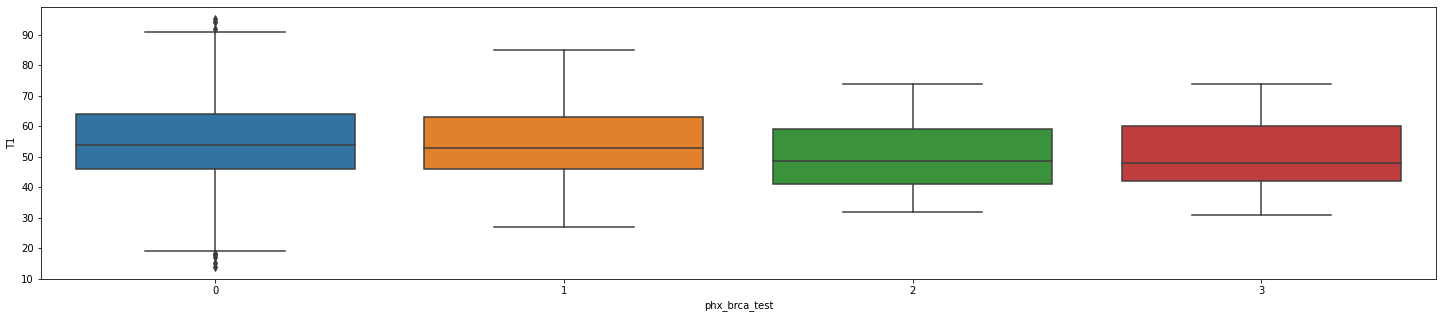

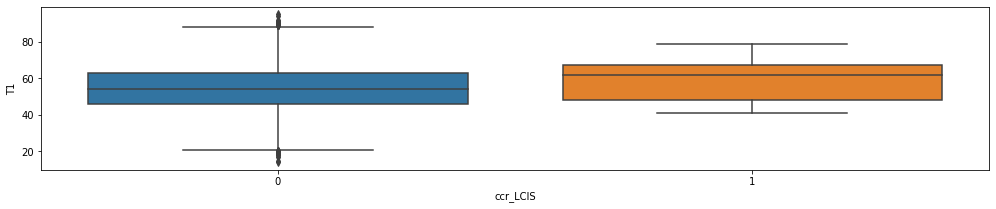

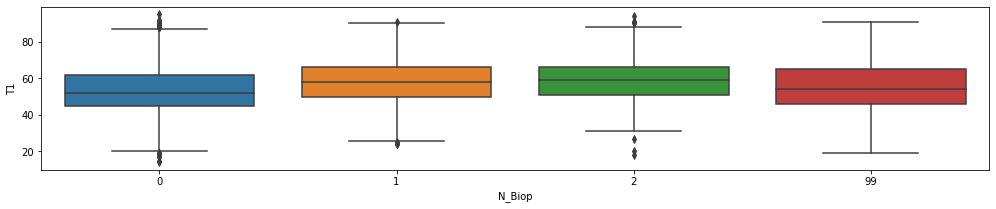

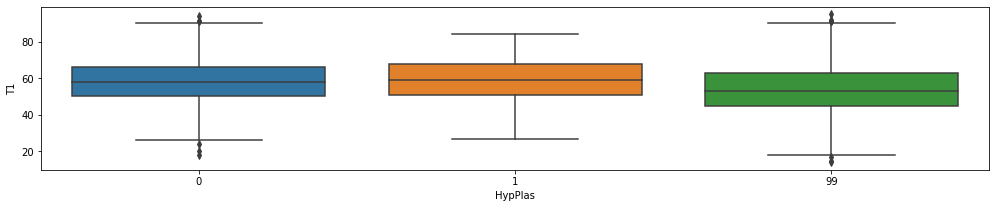

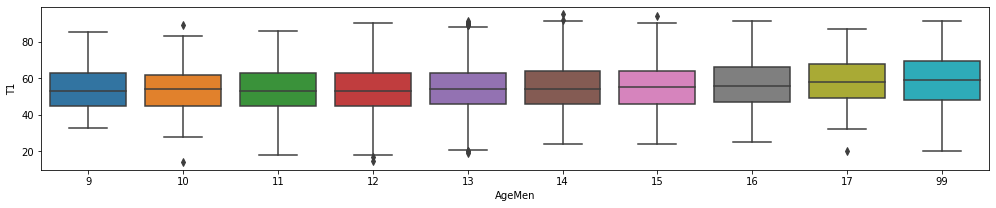

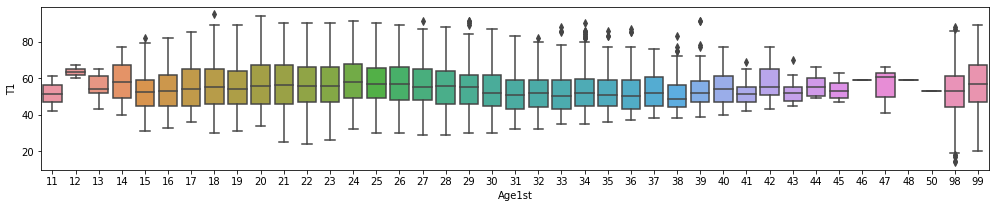

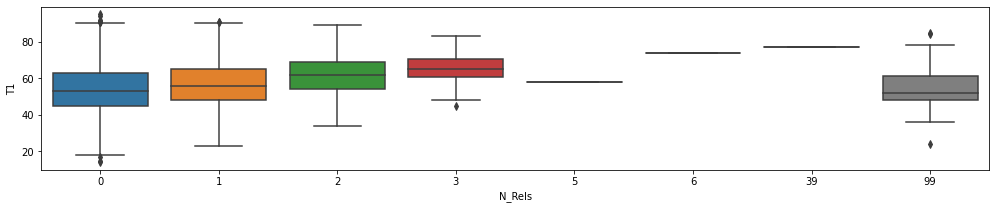

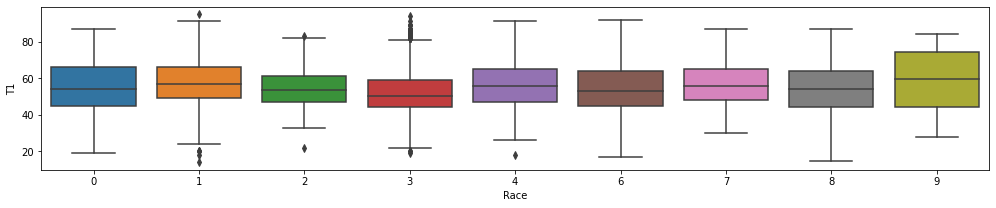

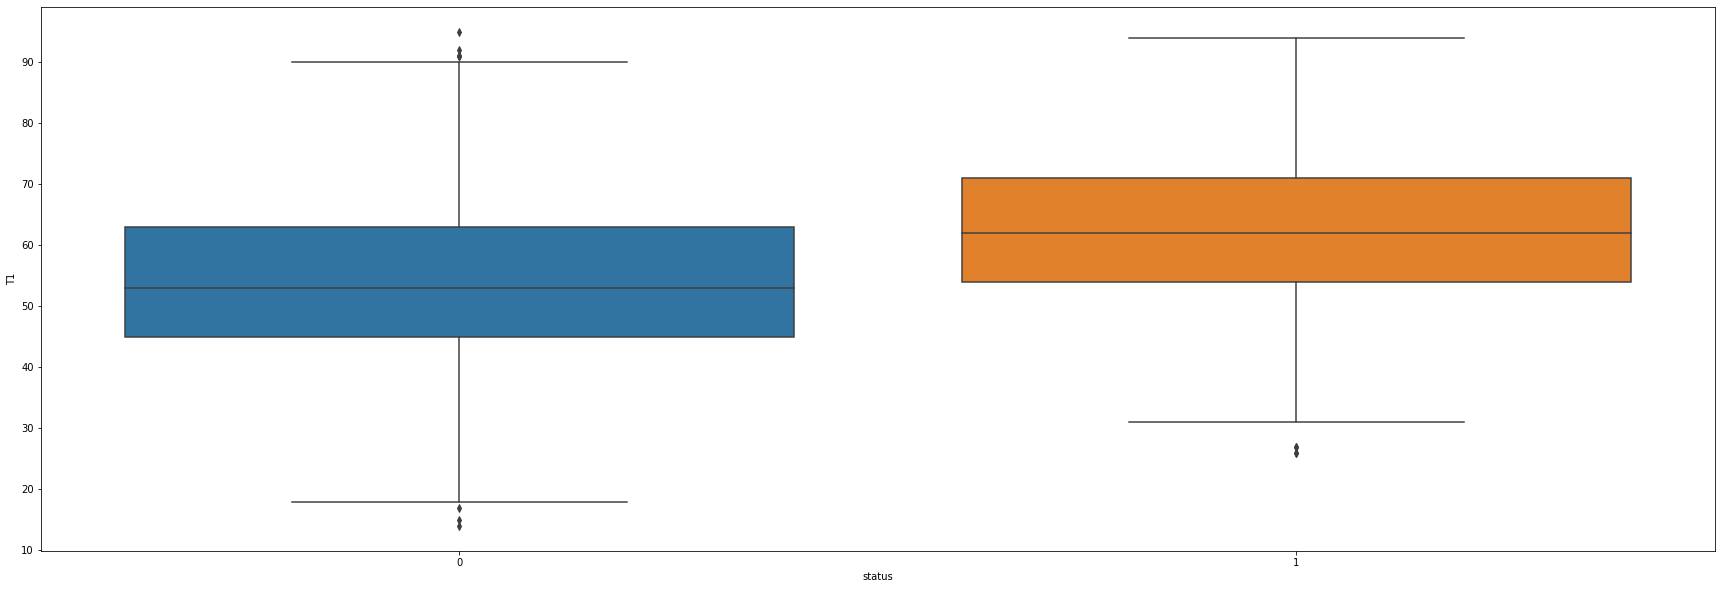

In [22]:
plt.figure(figsize=(25,5))
sns.boxplot(y=df['T1'], x=df['phx_brca_test']) 
   
plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['ccr_LCIS']) 

plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['N_Biop']) 

plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['HypPlas']) 

plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['AgeMen']) 

plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['Age1st'])

plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['N_Rels']) 
plt.figure(figsize=(17,3))
sns.boxplot(y=df['T1'], x=df['Race']) 
plt.figure(figsize=(30,10))
sns.boxplot(y=df['T1'], x=df['status']) 


Here we see that the risk of developing breast cancer increases with age.
(I will still deal with the graphs, this is not the final version)

Correlation heatmap can give us insight into which variables are important.

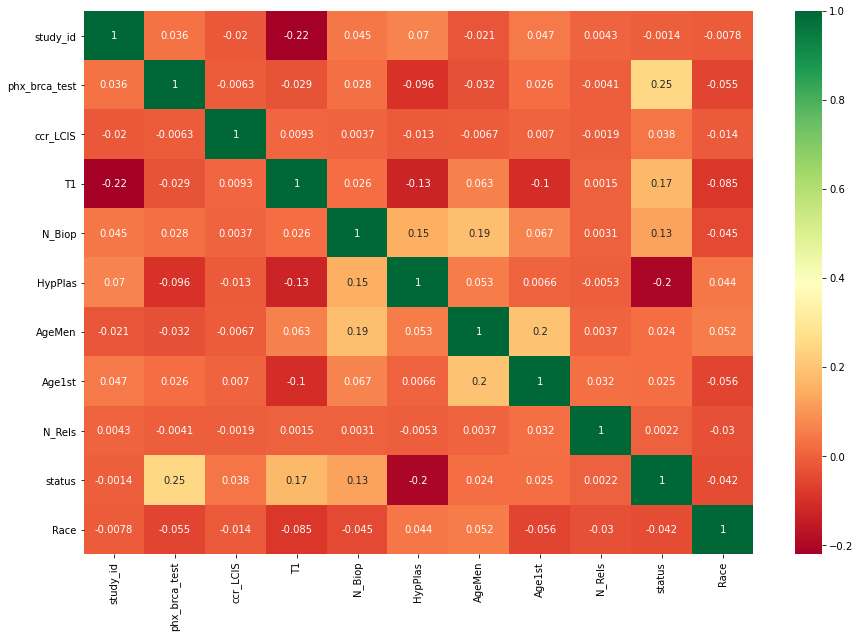

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0) 
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()


Here we see that the greatest influence on the development of breast cancer is exerted by: the presence of mutations in genes, age, the presence of atypical hyperplasia in the breast.

So, let's draw general conclusions.

In [24]:
df.corrwith(df['status']).sort_values(ascending=False)


status           1.000000
phx_brca_test    0.249218
T1               0.172632
N_Biop           0.125769
ccr_LCIS         0.037779
Age1st           0.024935
AgeMen           0.023630
N_Rels           0.002162
study_id        -0.001401
Race            -0.041649
HypPlas         -0.202627
dtype: float64

We looked again at the dependence of status on variables and found out that the greatest 4 influences have: 
* the presence of a gene mutation BRCA 1 and BRCA 2
* the age of the patient. The older, the more likely you are to get breast cancer
* A history of breast biopsies
* Atypical hyperplasia in the breast.

#3. Final dataset for modeling

In [25]:
X = df[['phx_brca_test', 'ccr_LCIS', 'T1','N_Biop', 'HypPlas', 'AgeMen', 'Age1st', 'N_Rels', 'Race']]
y = df[['status']]

Dividing the sample into test and training for training and validation.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((10541, 9), (10541, 1), (3514, 9), (10541, 1))

# 4. Modeling

##4.1 Evaluate the model

The XGClassifier model copes with classification tasks quite well.

In [27]:
rgr = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

##4.2 Model training

In [28]:
rgr.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.070392	validation_1-error:0.07029
[1]	validation_0-error:0.068684	validation_1-error:0.070006
[2]	validation_0-error:0.070297	validation_1-error:0.071713
[3]	validation_0-error:0.0684	validation_1-error:0.07029
[4]	validation_0-error:0.068115	validation_1-error:0.07029
[5]	validation_0-error:0.06802	validation_1-error:0.07029
[6]	validation_0-error:0.067925	validation_1-error:0.07029
[7]	validation_0-error:0.06802	validation_1-error:0.070575
[8]	validation_0-error:0.067736	validation_1-error:0.071429
[9]	validation_0-error:0.067451	validation_1-error:0.071429
[10]	validation_0-error:0.067546	validation_1-error:0.071429
[11]	validation_0-error:0.066692	validation_1-error:0.071713
[12]	validation_0-error:0.066597	validation_1-error:0.071429
[13]	validation_0-error:0.066692	validation_1-error:0.071144
[14]	validation_0-error:0.066123	validation_1-error:0.07029
[15]	validation_0-error:0.066123	validation_1-error:0.07029
[16]	validation_0-error:0.065933	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.6, verbosity=1)

#5. Evaluation

We are now going to evaluate the model. Let's use the automatic grade selection function.

In [29]:
def score(clf, x_train, x_test, y_train, y_test):
    try:
        y_pred_train, y_pred_test = clf.predict_proba(x_train)[:, 1], clf.predict_proba(x_test)[:, 1]
        print(f'Train-test roc auc: {roc_auc_score(y_train.astype(bool), y_pred_train)}, {roc_auc_score(y_test.astype(bool), y_pred_test)}')
    except AttributeError:
        y_pred_train, y_pred_test = clf.predict(x_train), clf.predict(x_test)
        print(f'Train-test r2 score: {r2_score(y_train, y_pred_train)}, {r2_score(y_test, y_pred_test)}')

In [30]:
score(rgr, X_train, X_test, y_train, y_test)

Train-test roc auc: 0.9412682233570039, 0.9102959463089575


Our model has shown a good result. 

In [31]:
df['T1'].mean()

55.158306652436856

mean

In [32]:
df['T1'].std()

11.651419186913893

In [33]:
df['N_Biop'].std()

30.7242876789007

Visualize features

[0]	validation_0-error:0.070392	validation_1-error:0.07029
[1]	validation_0-error:0.068684	validation_1-error:0.070006
[2]	validation_0-error:0.070297	validation_1-error:0.071713
[3]	validation_0-error:0.0684	validation_1-error:0.07029
[4]	validation_0-error:0.068115	validation_1-error:0.07029
[5]	validation_0-error:0.06802	validation_1-error:0.07029
[6]	validation_0-error:0.067925	validation_1-error:0.07029
[7]	validation_0-error:0.06802	validation_1-error:0.070575
[8]	validation_0-error:0.067736	validation_1-error:0.071429
[9]	validation_0-error:0.067451	validation_1-error:0.071429


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.067546	validation_1-error:0.071429
[11]	validation_0-error:0.066692	validation_1-error:0.071713
[12]	validation_0-error:0.066597	validation_1-error:0.071429
[13]	validation_0-error:0.066692	validation_1-error:0.071144
[14]	validation_0-error:0.066123	validation_1-error:0.07029
[15]	validation_0-error:0.066123	validation_1-error:0.07029
[16]	validation_0-error:0.065933	validation_1-error:0.070006
[17]	validation_0-error:0.066312	validation_1-error:0.070859
[18]	validation_0-error:0.066123	validation_1-error:0.071429
[19]	validation_0-error:0.066787	validation_1-error:0.071144
[20]	validation_0-error:0.066123	validation_1-error:0.070859
[21]	validation_0-error:0.065933	validation_1-error:0.070859
[22]	validation_0-error:0.066028	validation_1-error:0.070859
[23]	validation_0-error:0.065933	validation_1-error:0.070006
[24]	validation_0-error:0.065459	validation_1-error:0.070859
[25]	validation_0-error:0.065554	validation_1-error:0.070859
[26]	validation_0-error:0.

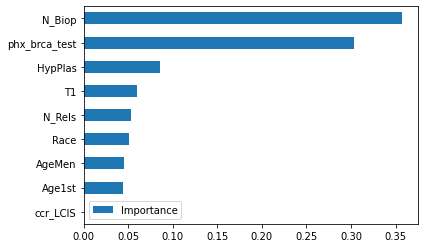

In [34]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_variable_importance( X , y ):
    rgr.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
    plot_model_var_imp( rgr , X , y )
    
plot_variable_importance(X_train, y_train)

N_Biop имеет важность почти 40% - см график
phx_bca_test - 27%,
HypPlas - около 10%
остальные см по графику также (1 - это 100%)